In [3]:
%vimception

ERROR: Line magic function `%vimception` not found.


In [1]:
%matplotlib inline
%config IPCompleter.greedy=True
import pylab
pylab.rcParams['figure.figsize'] = [10.0, 8.0]

In [2]:
import astroid, sys, os, logging
import numpy as np
logging.getLogger().setLevel(logging.DEBUG)

In [29]:
import code_reader; code_reader = reload(code_reader)
import heimdall; heimdall = reload(heimdall)
import data_flow; data_flow = reload(data_flow)
import watcher; watcher = reload(watcher)
import optimizer; optimizer = reload(optimizer)
import modcode; modcode = reload(modcode)
from tests import code7; code7 = reload(code7)
from tests import subscripts_1; subscripts_1 = reload(subscripts_1)
astroid.MANAGER.clear_cache()

In [ ]:
heim = heimdall.Heimdall(max_nesting=2, prof_shot_time=4)
%pdb off
heim.run('code7.g(7)', globals(), locals())

Automatic pdb calling has been turned OFF
g iter 0 Took 2.614014 seconds, sum is 97833036.779771

INFO:heimdall:Null row: ('profile', 0, 'profiler')
DEBUG:heimdall:Found node root: PStatRow( '','profile',0,'code7.g(7)', 1 )



Going to watch for ('/home/richard/workspace/heimdall/tests/code7.py', 'f1')
g iter 1 Took 2.842189 seconds, sum is 97833036.779771
Processing  LineExec(stmt_idx=0, filename='/home/richard/workspace/heimdall/tests/code7.py', lineno=14) for DFG 8767218287465
Processing 'rng = np.r...' consumed 0 statements
Next idx: 1
Processing  LineExec(stmt_idx=1, filename='/home/richard/workspace/heimdall/tests/code7.py', lineno=15) for DFG 8767218287465
Processing 's = rng.un...' consumed 0 statements
Next idx: 2
Processing  LineExec(stmt_idx=2, filename='/home/richard/workspace/heimdall/tests/code7.py', lineno=16) for DFG 8767218287465
Processing 't = rng.un...' consumed 0 statements
Next idx: 3
Processing  LineExec(stmt_idx=3, filename='/home/richard/workspace/heimdall/tests/code7.py', lineno=17) for DFG 8767218287465
Processing 'res = 0...' consumed 0 statements
Next idx: 4
Processing  LineExec(stmt_idx=4, filename='/home/richard/workspace/heimdall/tests/code7.py', lineno=19) for DFG 8767218287

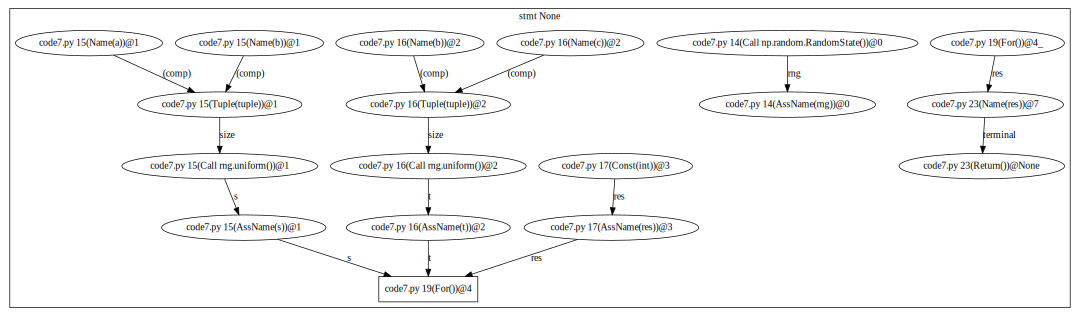

In [28]:
heim.dfg.draw_digraph(size="15")
#heim.dfg.find_node_by_string('For').dfg.draw_digraph(size="15")
#heim.dfg.find_node_by_string('For').dfg.find_node_by_string('For').dfg.draw_digraph(size="15")

In [22]:
%debug data_flow.analyze_flow(last_stmt_sequence, heim.watcher.loopstats).draw_digraph(size="15")

NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> <string>(1)<module>()

ipdb> s
> <string>(2)<module>()

ipdb> 
--Call--
> /home/richard/workspace/heimdall/data_flow.py(34)analyze_flow()
     33 
---> 34 def analyze_flow(stmt_sequence, loop_stats):
     35     """

ipdb> b 215
Breakpoint 1 at /home/richard/workspace/heimdall/data_flow.py:215
ipdb> cont
Processing  LineExec(stmt_idx=0, filename='/home/richard/workspace/heimdall/tests/code7.py', lineno=14) for DFG 8767219297905
Processing 'rng = np.r...' consumed 0 statements
Next idx: 1
Processing  LineExec(stmt_idx=1, filename='/home/richard/workspace/heimdall/tests/code7.py', lineno=15) for DFG 8767219297905
Processing 's = rng.un...' consumed 0 statements
Next idx: 2
Processing  LineExec(stmt_idx=2, filename='/home/richard/workspace/heimdall/tests/code7.py', lineno=16) for DFG 8767219297905
Processing 't = rng.un...' consumed 0 statements
Next idx: 3
Processing  LineExec(stmt_idx=3, filename='/home/richard/workspace/heim

In [18]:
%qtconsole

In [157]:
list(enumerate(last_stmt_sequence))

[(0, ('/home/richard/workspace/heimdall/tests/code7.py', 14, 'line')),
 (1, ('/home/richard/workspace/heimdall/tests/code7.py', 15, 'line')),
 (2, ('/home/richard/workspace/heimdall/tests/code7.py', 16, 'line')),
 (3, ('/home/richard/workspace/heimdall/tests/code7.py', 17, 'line')),
 (4, ('/home/richard/workspace/heimdall/tests/code7.py', 19, 'line')),
 (5, ('/home/richard/workspace/heimdall/tests/code7.py', 20, 'line')),
 (6, ('/home/richard/workspace/heimdall/tests/code7.py', 21, 'line')),
 (7, ('/home/richard/workspace/heimdall/tests/code7.py', 23, 'line')),
 (8, ('/home/richard/workspace/heimdall/tests/code7.py', 23, 'return'))]

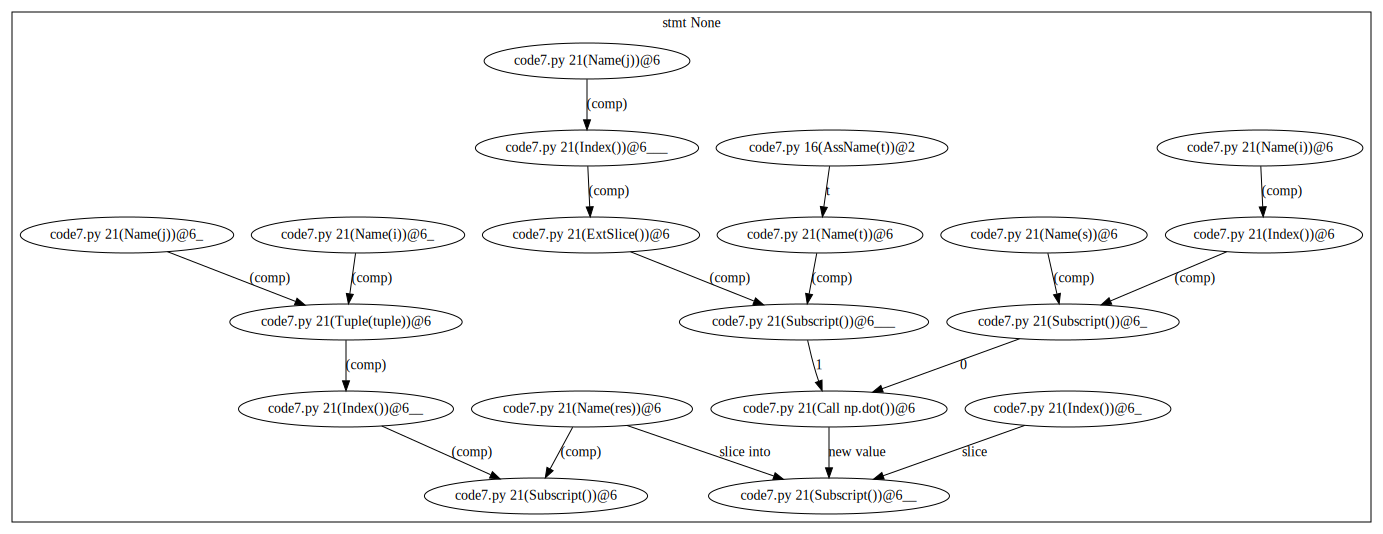

In [113]:
list(list(heim.dfg.nodes)[8].dfg.nodes)[-1].dfg.draw_digraph()